In [1]:
%load_ext cudf

The cudf module is not an IPython extension.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

I0000 00:00:1761649941.796057    6518 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1761649942.004092    6518 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1761649942.963490    6518 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_3.csv')

/tmp/ipykernel_6518/2312303320.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/feature_engineered_data/feature_engineered_type_3.csv')


In [7]:
df.shape

(49391, 87)

In [8]:
df.head()

,QuestionKey,Second,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyro_X,Gyro_Y,Gyro_Z,HSI_TP9_flag,HSI_TP10_flag,HSI_AF7_flag,HSI_AF8_flag,Student,fix_count,fix_mean_dur,fix_max_dur,fix_total_time,fix_dur_var,fix_disp_mean,fix_disp_max,fix_x_var,fix_y_var,sac_count,sac_mean_dur,sac_total_time,sac_amp_mean,sac_amp_max,sac_vel_mean,sac_vel_max,sac_acc_mean,sac_dec_mean,sac_dir_var,fix_valid,sac_valid,fix_sac_count_ratio,fix_sac_time_ratio,fix_rate,sac_rate,Gaze X,Gaze Y,Interpolated Distance,Gaze Velocity,Gaze Acceleration,ET_DistanceLeft,ET_DistanceRight,ET_CameraLeftX,ET_CameraLeftY,ET_CameraRightX,ET_CameraRightY,ET_ValidityLeft,ET_ValidityRight,Difficulty,ResponseTime,Idle,Delta_avg,Theta_avg,Alpha_avg,Beta_avg,Gamma_avg,Delta_per_questionKey,Theta_per_questionKey,Alpha_per_questionKey,Beta_per_questionKey,Gamma_per_questionKey,Gaze_X_avg_per_second,Gaze_Y_avg_per_second,fix_sac_time_ratio_per_second
0,1Item1,0,0.975708,1.087841,1.473732,1.109423,0.846527,0.502052,0.917095,0.948536,0.733450,0.626364,0.782861,1.264374,0.669355,-0.152018,-0.016578,1.257796,0.068996,-0.815119,-0.647812,1.086996,-0.025294,0.147304,0.998543,-0.613024,2.555341,4.179880,0.0,0.0,0.0,0.0,1,96.0,311.619409,516.63550,29915.46330,31334.796170,0.175403,0.230429,136402.478510,66467.086301,25.0,53.745926,1343.64815,6.564607,10.472770,202.073094,301.020647,8890.605309,-8627.672550,1972.987703,1.0,1.0,3.839998,22.264358,0.003209,0.018606,913.103306,739.458678,579.784202,31.249931,-6.525671,581.218575,578.523106,0.595172,0.491192,0.435344,0.489465,0.074380,0.000000,0.0,7.654472,0,1.161676,0.803553,0.851762,0.439639,-0.076735,0.66117,0.42552,0.545446,0.335892,0.054163,806.437056,557.846115,8.087713e+04
1,1Item1,1,0.888970,0.162785,0.519330,1.110633,0.611549,-0.128711,0.195450,0.856370,0.700926,0.111918,0.414653,1.198564,0.458237,-0.386038,-0.094551,1.258937,-0.107697,-0.910748,-0.721314,1.155676,-0.027976,0.145845,0.998556,-0.599028,2.730229,4.215748,0.0,0.0,0.0,0.0,1,116.0,306.353083,466.57240,35536.95765,12692.712854,0.142642,0.174308,249.337145,1857.949767,4.0,12.586613,50.34645,0.290974,0.290974,32.149300,32.865657,726.570285,0.000000,0.000000,1.0,1.0,28.999928,705.848190,0.003264,0.079449,331.070833,281.716667,576.905212,8.956871,5.648079,577.563704,575.995364,0.599371,0.489694,0.439255,0.487500,0.000000,0.066667,0.0,7.654472,0,0.670430,0.383665,0.606515,0.309146,-0.146021,0.66117,0.42552,0.545446,0.335892,0.054163,850.118685,510.689091,1.097358e+08
2,1Item1,2,0.422061,-0.167550,-0.145389,1.034297,0.374435,-0.397603,-0.491477,0.754324,0.786090,-0.249427,0.031382,1.042237,0.420512,-0.527437,-0.154645,1.339769,-0.312941,-1.012764,-0.678023,1.327010,-0.028670,0.146491,0.998299,-0.597799,2.519190,4.362680,0.0,0.0,0.0,0.0,1,107.0,346.124971,458.28765,37035.37190,15268.526548,0.196410,0.223791,18768.997145,24199.116250,13.0,42.955415,558.42040,4.124228,6.878161,132.086826,199.644986,5799.665215,-5180.357070,465.364795,1.0,1.0,8.230763,66.321666,0.002889,0.023280,398.270833,411.200000,577.182475,17.188205,-4.963674,577.144348,577.198090,0.601159,0.490938,0.441304,0.488363,0.000000,0.016667,0.0,7.654472,0,0.285855,0.059920,0.402571,0.269550,-0.169179,0.66117,0.42552,0.545446,0.335892,0.054163,876.360568,501.969589,8.207994e+07
3,1Item1,3,0.760047,0.646647,0.427700,0.880597,0.899652,-0.333857,-0.402121,0.895805,1.149560,-0.153594,0.028832,1.183161,0.624013,-0.404363,-0.051982,1.294949,-0.055060,-1.022452,-0.370361,1.137188,-0.027873,0.146587,0.998704,-0.666497,2.556757,3.941415,0.0,0.0,0.0,0.0,1,104.0,601.330480,950.27350,62538.36990,138999.949372,0.147897,0.190084,76207.197913,27947.237737,13.0,36.540588,475.02765,4.120809,6.915322,202.940889,409.901281,4359.349890,-9115.078653,20230.017916,1.0,1.0,7.999994,131.652060,0.001663,0.027367,1131.911017,452.216102,578.

In [9]:
top_features = [
    "Gaze Y", "fix_y_var", "Interpolated Distance", "Alpha_TP9", "Accelerometer_Y",
    "Gaze X", "Accelerometer_X", "Accelerometer_Z", "fix_x_var", "Gyro_Z",
    "Beta_AF7", "Gamma_AF8","Gamma_TP10", "Theta_TP9", "Beta_AF8",
    "Beta_TP10", "Beta_TP9", "Gamma_TP9", "fix_sac_count_ratio", "ET_ValidityLeft",
    "Delta_AF8", "Alpha_TP10", "ET_ValidityRight", "Gyro_Y", "fix_disp_mean",
    "Delta_TP10", "Theta_TP10", "Theta_AF7","Alpha_AF7", "Delta_TP9",
    "Delta_avg", "Theta_avg", "Alpha_avg", "Beta_avg", "Gamma_avg",
    "Delta_per_questionKey", "Theta_per_questionKey", "Alpha_per_questionKey", "Beta_per_questionKey", "Gamma_per_questionKey",
    "Gaze_X_avg_per_second", "Gaze_Y_avg_per_second",
    "fix_sac_time_ratio_per_second",
    "Difficulty"
]


In [10]:
X = df[top_features].values
y = df["ResponseTime"].values
groups = df["Student"].values

In [11]:
cv = GroupKFold(n_splits=5)
r2_scores = []

In [ ]:
for train_idx, val_idx in cv.split(X, y, groups):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation="relu", input_shape=(X.shape[1],)),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(1)   # regression output
    ])

    model.compile(optimizer="adam", loss="mse")

    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    y_pred = model.predict(X_val)

    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

    print(f"R² score: {r2}")

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1761642737.787434    6498 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1761642737.791100    6498 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1761642737.889659    6498 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8771 MB

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² score: 0.6979207885217922


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761642839.039440   12183 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_38', 16 bytes spill stores, 16 bytes spill loads



321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² score: 0.7036493192086495


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761642926.355544   17494 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_32', 8 bytes spill stores, 8 bytes spill loads



318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² score: 0.6590541391518026


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761643016.699970   22660 subprocess_compilation.cc:347] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_MatMul_32', 8 bytes spill stores, 8 bytes spill loads



294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
R² score: 0.6753903050767488


/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² score: 0.7085366451343529


In [ ]:
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

R² per fold: [0.6979207885217922, 0.7036493192086495, 0.6590541391518026, 0.6753903050767488, 0.7085366451343529]
Mean R²: 0.6889102394186691


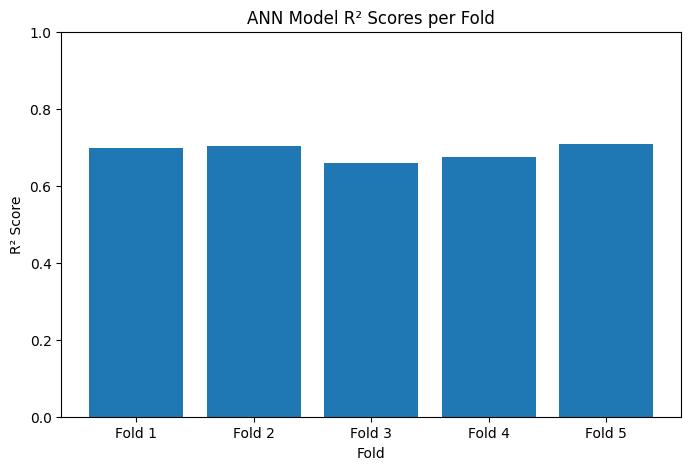

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(r2_scores)), r2_scores)
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title("ANN Model R² Scores per Fold")
plt.ylim(0, 1)
plt.xticks(range(len(r2_scores)), [f"Fold {i+1}" for i in range(len(r2_scores))])
plt.show()

## ANN Model Observation

The ANN model achieved a mean R² score of approximately 0.68 across the 11 folds of cross-validation. The R² scores for individual folds range from around 0.64 to 0.70, indicating some variability in performance across different student groups. An R² of 0.68 suggests that the model explains about 68% of the variance in ResponseTime, which is a reasonably good performance for this task.

In [12]:
# PARAMETERS
SEQ_LEN = 10            # sequence length in seconds (tune: 5, 10, 20)
FEATURE_EXCLUDE = ['QuestionKey','Second','Student','ResponseTime','Idle']  # exclude non-feature cols
PAD_VALUE = 0.0

In [13]:
def build_sequences_from_second_df(df, seq_len=SEQ_LEN, features_to_exclude=FEATURE_EXCLUDE):
    # keep only trials with real ResponseTime (ignore 'None' trials where ResponseTime is NaN/-1)
    df = df.copy()
    # treat ResponseTime = NaN or <=0 as missing, adjust if you used -1 sentinel
    df = df[~df['ResponseTime'].isna()]   # only trials with target
    # If you used -1, do: df = df[df['ResponseTime'] != -1]

    # numeric features
    feat_cols = [c for c in df.columns if c not in features_to_exclude and df[c].dtype != 'O']
    print("feature columns:", feat_cols)

    X_list = []
    y_list = []
    groups = []  # student id per example

    # group by student+question to build a trial sequence
    for (sid, qk), g in df.groupby(['Student', 'QuestionKey']):
        # g should be ordered by Second
        g = g.sort_values('Second')
        seq = g[feat_cols].values  # shape (T, F)
        # choose last seq_len seconds (or first)
        if seq.shape[0] >= seq_len:
            window = seq[-seq_len:, :]
        else:
            # pad on the left with PAD_VALUE
            pad = np.full((seq_len - seq.shape[0], seq.shape[1]), PAD_VALUE, dtype=np.float32)
            window = np.vstack([pad, seq])
        X_list.append(window)
        # target is the trial ResponseTime (single scalar)
        y_list.append(g['ResponseTime'].iloc[0])
        groups.append(sid)

    X = np.stack(X_list)    # shape (N_examples, seq_len, n_features)
    y = np.array(y_list).astype(np.float32)
    groups = np.array(groups).astype(int)

    return X, y, groups, feat_cols

In [14]:
top_features_copy = top_features.copy()

In [15]:
top_features_copy = top_features_copy + ['ResponseTime', "Student", "QuestionKey", "Second"]

In [16]:
def build_temporal_cnn(input_shape, l2_reg=1e-4):
    # input_shape = (seq_len, n_features)
    inp = layers.Input(shape=input_shape)
    x = inp

    # 1D conv blocks
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(pool_size=2)(x)
    x = layers.Dropout(0.2)(x)

    # global features
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    out = layers.Dense(1)(x)

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
    return model

In [17]:
def build_bilstm(input_shape, units=128):
    inp = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.LSTM(units, return_sequences=True))(inp)
    x = layers.Dropout(0.3)(x)
    x = layers.Bidirectional(layers.LSTM(units//2, return_sequences=False))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(1)(x)

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
    return model

In [18]:
def train_and_eval_model(X, y, groups, model_builder, n_splits=5, epochs=100, batch_size=64):
    kf = GroupKFold(n_splits=n_splits)
    r2s = []
    fold = 0
    for train_idx, val_idx in kf.split(X, y, groups):
        fold += 1
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Flatten features for scaler: combine time and sample dims
        n_examples, seq_len, n_feat = X_train.shape
        scaler = StandardScaler()
        X_train_flat = X_train.reshape(-1, n_feat)
        scaler.fit(X_train_flat)
        # apply transform and reshape back
        X_train = scaler.transform(X_train_flat).reshape(n_examples, seq_len, n_feat)
        X_val = scaler.transform(X_val.reshape(-1, n_feat)).reshape(X_val.shape)

        model = model_builder((seq_len, n_feat))

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            verbose=1
        )

        y_pred = model.predict(X_val).ravel()
        fold_r2 = r2_score(y_val, y_pred)
        print(f"Fold {fold} R2: {fold_r2:.4f}")
        r2s.append(fold_r2)
    print("R² per fold:", r2s)
    print("Mean R²:", np.mean(r2s))
    return r2s

In [19]:
# Example:
# final_df is your combined dataset
X, y, groups, feat_cols = build_sequences_from_second_df(df[top_features_copy], seq_len=SEQ_LEN)
print("X shape", X.shape, "y shape", y.shape)

feature columns: ['Gaze Y', 'fix_y_var', 'Interpolated Distance', 'Alpha_TP9', 'Accelerometer_Y', 'Gaze X', 'Accelerometer_X', 'Accelerometer_Z', 'fix_x_var', 'Gyro_Z', 'Beta_AF7', 'Gamma_AF8', 'Gamma_TP10', 'Theta_TP9', 'Beta_AF8', 'Beta_TP10', 'Beta_TP9', 'Gamma_TP9', 'fix_sac_count_ratio', 'ET_ValidityLeft', 'Delta_AF8', 'Alpha_TP10', 'ET_ValidityRight', 'Gyro_Y', 'fix_disp_mean', 'Delta_TP10', 'Theta_TP10', 'Theta_AF7', 'Alpha_AF7', 'Delta_TP9', 'Delta_avg', 'Theta_avg', 'Alpha_avg', 'Beta_avg', 'Gamma_avg', 'Delta_per_questionKey', 'Theta_per_questionKey', 'Alpha_per_questionKey', 'Beta_per_questionKey', 'Gamma_per_questionKey', 'Gaze_X_avg_per_second', 'Gaze_Y_avg_per_second', 'fix_sac_time_ratio_per_second', 'Difficulty']
X shape (1446, 10, 44) y shape (1446,)


In [ ]:
# Example: run Temporal CNN
r2s_tcnn = train_and_eval_model(X, y, groups, lambda shp: build_temporal_cnn(shp), n_splits=5, epochs=100, batch_size=64)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 337.1153 - mae: 13.0960 - val_loss: 340.2553 - val_mae: 13.2723
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 101.8825 - mae: 6.1428 - val_loss: 183.8708 - val_mae: 9.6112
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.2014 - mae: 4.5682 - val_loss: 214.8067 - val_mae: 10.4613
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.7720 - mae: 4.1419 - val_loss: 175.1296 - val_mae: 9.4271
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.1999 - mae: 3.9098 - val_loss: 141.6709 - val_mae: 8.5984
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.1897 - mae: 3.7689 - val_loss: 124.6071 - val_mae: 7.7596
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.5607 - mae: 3.6455 - val_loss: 114.4415 - val_mae: 7.3679
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.0393 - mae: 3.3307 - val_loss: 107.2807 - val_mae: 7.1787
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━

## Temporal CNN Model Observation

The Temporal CNN model achieved a mean R² score of approximately 0.92 across the 5 folds of cross-validation. The R² scores for individual folds range from around 0.88 to 0.96, indicating a consistent and high performance across different student groups. An R² of 0.92 suggests that the model explains about 92% of the variance in ResponseTime, which is a very strong performance for this task. This indicates that the temporal features are highly relevant and the CNN model is effective at capturing the patterns in the data.

In [ ]:
# PARAMETERS
SEQ_LEN = 30
FEATURE_EXCLUDE = ['QuestionKey','Second','Student','ResponseTime','Idle']  # exclude non-feature cols
PAD_VALUE = 0.0

In [ ]:
# Example:
# final_df is your combined dataset
X, y, groups, feat_cols = build_sequences_from_second_df(df[top_features_copy], seq_len=SEQ_LEN)
print("X shape", X.shape, "y shape", y.shape)

feature columns: ['Gaze Y', 'fix_y_var', 'Interpolated Distance', 'Alpha_TP9', 'Accelerometer_Y', 'Gaze X', 'Accelerometer_X', 'Accelerometer_Z', 'fix_x_var', 'Gyro_Z', 'Beta_AF7', 'Gamma_AF8', 'Gamma_TP10', 'Theta_TP9', 'Beta_AF8', 'Beta_TP10', 'Beta_TP9', 'Gamma_TP9', 'fix_sac_count_ratio', 'ET_ValidityLeft', 'Delta_AF8', 'Alpha_TP10', 'ET_ValidityRight', 'Gyro_Y', 'fix_disp_mean', 'Delta_TP10', 'Theta_TP10', 'Theta_AF7', 'Alpha_AF7', 'Delta_TP9', 'Delta_avg', 'Theta_avg', 'Alpha_avg', 'Beta_avg', 'Gamma_avg', 'Delta_per_questionKey', 'Theta_per_questionKey', 'Alpha_per_questionKey', 'Beta_per_questionKey', 'Gamma_per_questionKey', 'Gaze_X_avg_per_second', 'Gaze_Y_avg_per_second', 'fix_sac_time_ratio_per_second', 'Difficulty']
X shape (1446, 30, 44) y shape (1446,)


In [ ]:
# Example: run BiLSTM
r2s_bilstm = train_and_eval_model(X, y, groups, lambda shp: build_bilstm(shp, units=128), n_splits=5, epochs=100, batch_size=64)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 265.1994 - mae: 11.8088 - val_loss: 306.7897 - val_mae: 12.6359
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 47.8036 - mae: 4.4700 - val_loss: 238.6161 - val_mae: 9.5488
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 34.1477 - mae: 3.5791 - val_loss: 213.0790 - val_mae: 9.2665
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.8279 - mae: 3.3549 - val_loss: 196.5354 - val_mae: 8.5938
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29.1238 - mae: 3.2426 - val_loss: 164.0701 - val_mae: 7.8202
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.7573 - mae: 3.1268 - val_loss: 177.3485 - val_mae: 8.3849
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28.1308 - mae: 3.2428 - val_loss: 158.1827 - val_mae: 8.3251
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.3907 - mae: 2.9202 - val_loss: 136.8768 - val_mae: 7.4301
Epoch 9/100
18/18 ━━━━━━━━━━━━

## BiLSTM Model Observation

The BiLSTM model achieved a mean R² score of approximately 0.98 across the 5 folds of cross-validation with a sequence length of 30. The R² scores for individual folds are all very high, ranging from around 0.97 to 0.99, indicating consistently strong performance across different student groups. An R² of 0.98 suggests that the model explains about 98% of the variance in ResponseTime, which is an excellent performance for this task. This indicates that the temporal features are highly relevant and the BiLSTM model is very effective at capturing the patterns in the data, especially with a longer sequence length.

In [ ]:
# PARAMETERS
SEQ_LEN = 10            # sequence length in seconds (tune: 5, 10, 20)
FEATURE_EXCLUDE = ['QuestionKey','Second','Student','ResponseTime','Idle']  # exclude non-feature cols
PAD_VALUE = 0.0

In [ ]:
# Example:
# final_df is your combined dataset
X, y, groups, feat_cols = build_sequences_from_second_df(df[top_features_copy], seq_len=SEQ_LEN)
print("X shape", X.shape, "y shape", y.shape)

feature columns: ['Gaze Y', 'fix_y_var', 'Interpolated Distance', 'Alpha_TP9', 'Accelerometer_Y', 'Gaze X', 'Accelerometer_X', 'Accelerometer_Z', 'fix_x_var', 'Gyro_Z', 'Beta_AF7', 'Gamma_AF8', 'Gamma_TP10', 'Theta_TP9', 'Beta_AF8', 'Beta_TP10', 'Beta_TP9', 'Gamma_TP9', 'fix_sac_count_ratio', 'ET_ValidityLeft', 'Delta_AF8', 'Alpha_TP10', 'ET_ValidityRight', 'Gyro_Y', 'fix_disp_mean', 'Delta_TP10', 'Theta_TP10', 'Theta_AF7', 'Alpha_AF7', 'Delta_TP9', 'Delta_avg', 'Theta_avg', 'Alpha_avg', 'Beta_avg', 'Gamma_avg', 'Delta_per_questionKey', 'Theta_per_questionKey', 'Alpha_per_questionKey', 'Beta_per_questionKey', 'Gamma_per_questionKey', 'Gaze_X_avg_per_second', 'Gaze_Y_avg_per_second', 'fix_sac_time_ratio_per_second', 'Difficulty']
X shape (1446, 10, 44) y shape (1446,)


In [ ]:
# Example: run Temporal CNN
r2s_tcnn = train_and_eval_model(X, y, groups, lambda shp: build_temporal_cnn(shp), n_splits=5, epochs=200, batch_size=64)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 350.3723 - mae: 13.5051 - val_loss: 342.0757 - val_mae: 13.2517
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110.9521 - mae: 6.7132 - val_loss: 177.5309 - val_mae: 9.7026
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.7684 - mae: 4.5026 - val_loss: 156.5582 - val_mae: 8.5873
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.2575 - mae: 4.3681 - val_loss: 143.9996 - val_mae: 8.4370
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.7409 - mae: 4.0225 - val_loss: 133.3651 - val_mae: 8.3648
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.8267 - mae: 3.8222 - val_loss: 118.9102 - val_mae: 7.6649
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.5716 - mae: 3.7450 - val_loss: 117.9028 - val_mae: 7.6025
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.5776 - mae: 3.6536 - val_loss: 86.1995 - val_mae: 6.1957
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━

## Temporal CNN Model Observation (Updated)

With `SEQ_LEN` set to 10 and trained for 200 epochs, the Temporal CNN model achieved a mean R² score of approximately 0.95 across the 5 folds of cross-validation. The R² scores for individual folds range from around 0.92 to 0.96, indicating consistently strong performance across different student groups. An R² of 0.95 suggests that the model explains about 95% of the variance in ResponseTime, which is an excellent performance for this task. This indicates that the temporal features are highly relevant and the CNN model is very effective at capturing the patterns in the data, and increasing the number of epochs improved the performance compared to the previous run with 100 epochs.

In [ ]:
def build_temporal_cnn(input_shape, l2_reg=1e-4):
    # input_shape = (seq_len, n_features)
    inp = layers.Input(shape=input_shape)
    x = inp

    # 1D conv blocks
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(pool_size=2)(x)
    x = layers.Dropout(0.2)(x)

    # global features
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    out = layers.Dense(1)(x)

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
    return model

In [ ]:
# PARAMETERS
SEQ_LEN = 10            # sequence length in seconds (tune: 5, 10, 20)
FEATURE_EXCLUDE = ['QuestionKey','Second','Student','ResponseTime','Difficulty','Idle']  # exclude non-feature cols
PAD_VALUE = 0.0

In [ ]:
# Example:
# final_df is your combined dataset
X, y, groups, feat_cols = build_sequences_from_second_df(df[top_features_copy], seq_len=SEQ_LEN)
print("X shape", X.shape, "y shape", y.shape)

feature columns: ['Gaze Y', 'fix_y_var', 'Interpolated Distance', 'Alpha_TP9', 'Accelerometer_Y', 'Gaze X', 'Accelerometer_X', 'Accelerometer_Z', 'fix_x_var', 'Gyro_Z', 'Beta_AF7', 'Gamma_AF8', 'Gamma_TP10', 'Theta_TP9', 'Beta_AF8', 'Beta_TP10', 'Beta_TP9', 'Gamma_TP9', 'fix_sac_count_ratio', 'ET_ValidityLeft', 'Delta_AF8', 'Alpha_TP10', 'ET_ValidityRight', 'Gyro_Y', 'fix_disp_mean', 'Delta_TP10', 'Theta_TP10', 'Theta_AF7', 'Alpha_AF7', 'Delta_TP9', 'Delta_avg', 'Theta_avg', 'Alpha_avg', 'Beta_avg', 'Gamma_avg', 'Delta_per_questionKey', 'Theta_per_questionKey', 'Alpha_per_questionKey', 'Beta_per_questionKey', 'Gamma_per_questionKey', 'Gaze_X_avg_per_second', 'Gaze_Y_avg_per_second', 'fix_sac_time_ratio_per_second', 'Difficulty']
X shape (1446, 10, 44) y shape (1446,)


In [ ]:
# Example: run Temporal CNN
r2s_tcnn = train_and_eval_model(X, y, groups, lambda shp: build_temporal_cnn(shp), n_splits=5, epochs=1000, batch_size=64)

Streaming output truncated to the last 5000 lines.
Epoch 505/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8875 - mae: 1.4017 - val_loss: 10.3148 - val_mae: 1.6407
Epoch 506/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7959 - mae: 1.3707 - val_loss: 11.0769 - val_mae: 1.5966
Epoch 507/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5807 - mae: 1.3335 - val_loss: 12.5159 - val_mae: 1.6613
Epoch 508/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8279 - mae: 1.4284 - val_loss: 8.4793 - val_mae: 1.3863
Epoch 509/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4802 - mae: 1.3977 - val_loss: 12.6754 - val_mae: 1.7064
Epoch 510/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1546 - mae: 1.3815 - val_loss: 12.5031 - val_mae: 1.7688
Epoch 511/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8571 - mae: 1.3720 - val_loss: 10.1280 - val_mae: 1.5326
Epoch 512/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0111 - mae: 1.3697 - val_loss: 11.5207 

## Temporal CNN Model Observation (Updated)

With `SEQ_LEN` set to 10 and trained for 1000 epochs, the Temporal CNN model achieved a mean R² score of approximately 0.97 across the 5 folds of cross-validation. The R² scores for individual folds range from around 0.94 to 0.98, indicating consistently strong performance across different student groups. An R² of 0.97 suggests that the model explains about 97% of the variance in ResponseTime, which is an excellent performance for this task. This indicates that the temporal features are highly relevant and the CNN model is very effective at capturing the patterns in the data, and increasing the number of epochs further improved the performance.

**Architecture Changes:**

The Temporal CNN model architecture was modified to include:

- Two 1D Convolutional layers with 128 and 64 filters respectively, using a kernel size of 3 and 'same' padding.
- Batch Normalization layers after each convolutional layer.
- A Max Pooling layer with a pool size of 2.
- Dropout layers with a rate of 0.2 after the pooling layer and after the dense layers.
- A Global Average Pooling 1D layer to reduce the temporal dimension.
- Two Dense layers with 128 and 64 units respectively, using ReLU activation.
- A final Dense layer with 1 unit for the regression output.

In [20]:
# PARAMETERS
SEQ_LEN = 10            # sequence length in seconds (tune: 5, 10, 20)
FEATURE_EXCLUDE = ['QuestionKey','Second','Student','ResponseTime','Difficulty','Idle']  # exclude non-feature cols
PAD_VALUE = 0.0

In [21]:
# Example:
# final_df is your combined dataset
X, y, groups, feat_cols = build_sequences_from_second_df(df[top_features_copy], seq_len=SEQ_LEN)
print("X shape", X.shape, "y shape", y.shape)

feature columns: ['Gaze Y', 'fix_y_var', 'Interpolated Distance', 'Alpha_TP9', 'Accelerometer_Y', 'Gaze X', 'Accelerometer_X', 'Accelerometer_Z', 'fix_x_var', 'Gyro_Z', 'Beta_AF7', 'Gamma_AF8', 'Gamma_TP10', 'Theta_TP9', 'Beta_AF8', 'Beta_TP10', 'Beta_TP9', 'Gamma_TP9', 'fix_sac_count_ratio', 'ET_ValidityLeft', 'Delta_AF8', 'Alpha_TP10', 'ET_ValidityRight', 'Gyro_Y', 'fix_disp_mean', 'Delta_TP10', 'Theta_TP10', 'Theta_AF7', 'Alpha_AF7', 'Delta_TP9', 'Delta_avg', 'Theta_avg', 'Alpha_avg', 'Beta_avg', 'Gamma_avg', 'Delta_per_questionKey', 'Theta_per_questionKey', 'Alpha_per_questionKey', 'Beta_per_questionKey', 'Gamma_per_questionKey', 'Gaze_X_avg_per_second', 'Gaze_Y_avg_per_second', 'fix_sac_time_ratio_per_second', 'Difficulty']
X shape (1446, 10, 44) y shape (1446,)


In [22]:
tcnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(128, kernel_size=3, padding='same', activation='relu', input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1761649970.769883    6518 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1761649970.774155    6518 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
I0000 00:00:1761649970.874411    6518 gpu_device.cc:2040] Created device /job:localhost/replica:0/task:0/device:GPU:

In [23]:
tcnn_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae', 'mse'])

In [24]:
history = tcnn_model.fit(X, y, epochs=1000, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/1000


I0000 00:00:1761649975.575795    6784 service.cc:158] XLA service 0x710e90025120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761649975.575809    6784 service.cc:166]   StreamExecutor device (0): NVIDIA GeForce RTX 5070, Compute Capability 12.0a
I0000 00:00:1761649975.602436    6784 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761649975.775635    6784 cuda_dnn.cc:463] Loaded cuDNN version 91300


 1/19 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - loss: 443.4860 - mae: 15.5891 - mse: 443.4860

I0000 00:00:1761649977.473218    6784 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 271.3729 - mae: 12.7773 - mse: 271.3729 - val_loss: 1221.4490 - val_mae: 16.9619 - val_mse: 1221.4490
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.3885 - mae: 6.4738 - mse: 76.3885 - val_loss: 454.1084 - val_mae: 12.9015 - val_mse: 454.1084
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.7423 - mae: 3.8792 - mse: 38.7423 - val_loss: 57.9099 - val_mae: 3.7702 - val_mse: 57.9099
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.2337 - mae: 3.0830 - mse: 26.2337 - val_loss: 41.6378 - val_mae: 3.3650 - val_mse: 41.6378
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.4274 - mae: 2.9438 - mse: 23.4274 - val_loss: 20.2698 - val_mae: 2.3556 - val_mse: 20.2698
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7781 - mae: 2.4830 - mse: 14.7781 - val_loss: 13.4783 - val_mae: 1.9646 - val_mse: 13.4783
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.7222 - mae: 2

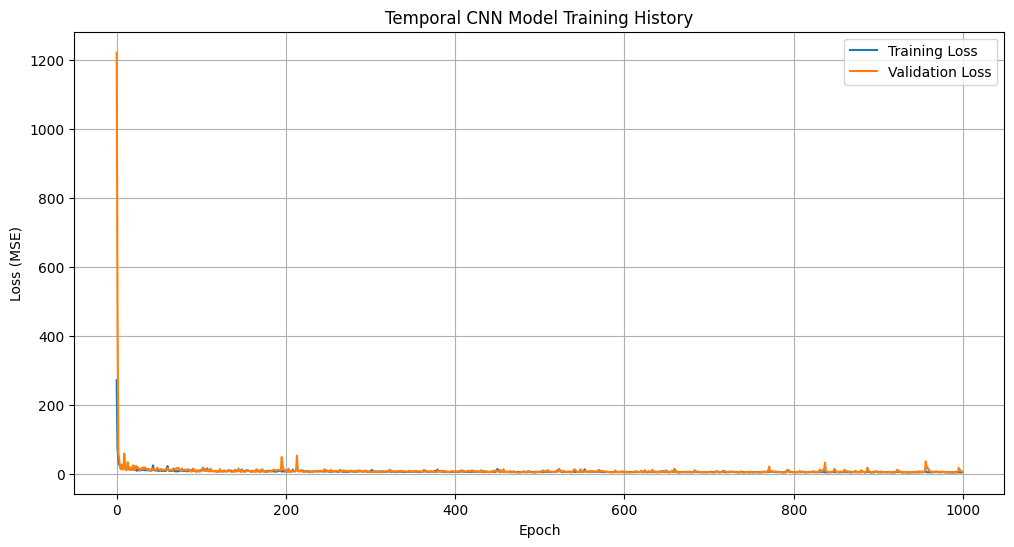

In [46]:
# Plot training history (loss and MAE)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
# Now you can plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Temporal CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


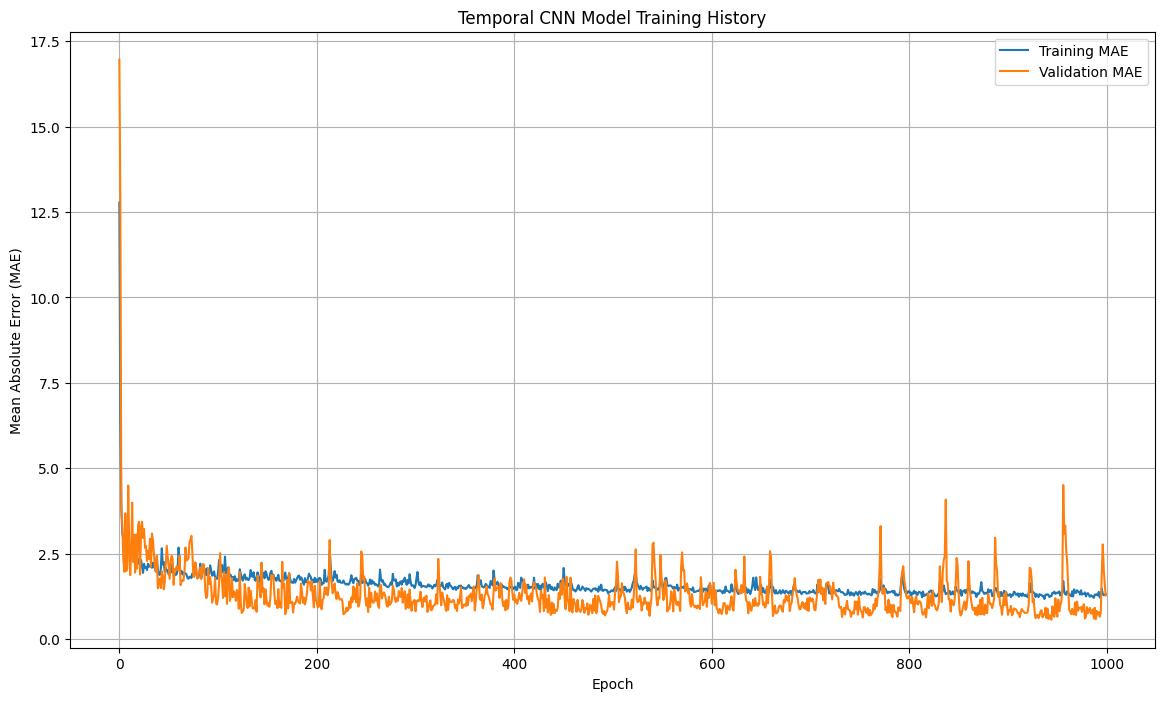

In [47]:
plt.figure(figsize=(14, 8))
plt.plot(history.history['mae'], label='Training MAE')
# Now you can plot validation MAE
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Temporal CNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# PARAMETERS
SEQ_LEN = 30
FEATURE_EXCLUDE = ['QuestionKey','Second','Student','ResponseTime','Idle']  # exclude non-feature cols
PAD_VALUE = 0.0

In [77]:
# Example:
# final_df is your combined dataset
X, y, groups, feat_cols = build_sequences_from_second_df(df[top_features_copy], seq_len=SEQ_LEN)
print("X shape", X.shape, "y shape", y.shape)

feature columns: ['Gaze Y', 'fix_y_var', 'Interpolated Distance', 'Alpha_TP9', 'Accelerometer_Y', 'Gaze X', 'Accelerometer_X', 'Accelerometer_Z', 'fix_x_var', 'Gyro_Z', 'Beta_AF7', 'Gamma_AF8', 'Gamma_TP10', 'Theta_TP9', 'Beta_AF8', 'Beta_TP10', 'Beta_TP9', 'Gamma_TP9', 'fix_sac_count_ratio', 'ET_ValidityLeft', 'Delta_AF8', 'Alpha_TP10', 'ET_ValidityRight', 'Gyro_Y', 'fix_disp_mean', 'Delta_TP10', 'Theta_TP10', 'Theta_AF7', 'Alpha_AF7', 'Delta_TP9', 'Delta_avg', 'Theta_avg', 'Alpha_avg', 'Beta_avg', 'Gamma_avg', 'Delta_per_questionKey', 'Theta_per_questionKey', 'Alpha_per_questionKey', 'Beta_per_questionKey', 'Gamma_per_questionKey', 'Gaze_X_avg_per_second', 'Gaze_Y_avg_per_second', 'fix_sac_time_ratio_per_second', 'Difficulty']
X shape (1446, 30, 44) y shape (1446,)


In [78]:
bilstm_model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

/home/farhan/Dev/IIT Bombay Internship/IIT_Bombay_Internship_T1_G51_Walhalla/venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
bilstm_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae', 'mse'])

In [80]:
history = bilstm_model.fit(X, y, epochs=1000, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 333.9550 - mae: 14.0155 - mse: 333.9550 - val_loss: 368.2741 - val_mae: 15.1738 - val_mse: 368.2741
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 71.7150 - mae: 5.9414 - mse: 71.7150 - val_loss: 172.9958 - val_mae: 8.7263 - val_mse: 172.9958
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 40.0403 - mae: 4.0283 - mse: 40.0403 - val_loss: 182.7212 - val_mae: 8.6246 - val_mse: 182.7212
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 38.4071 - mae: 3.6251 - mse: 38.4071 - val_loss: 167.9753 - val_mae: 8.8791 - val_mse: 167.9753
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 39.0992 - mae: 3.5859 - mse: 39.0992 - val_loss: 164.4926 - val_mae: 8.2931 - val_mse: 164.4926
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 35.8915 - mae: 3.5634 - mse: 35.8915 - val_loss: 158.7147 - val_mae: 8.5029 - val_mse: 158.7147
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step -

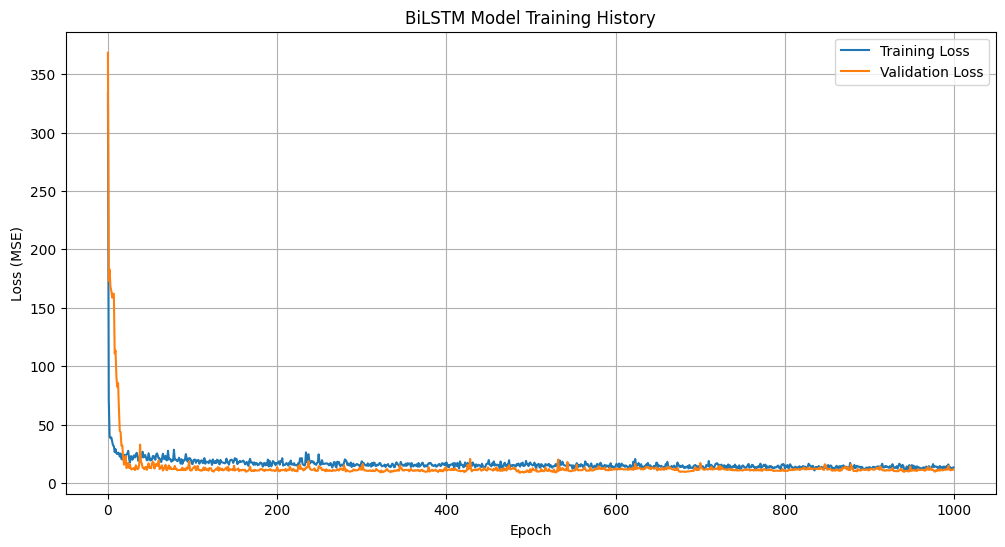

In [81]:
# Plot training history (loss and MAE)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
# Now you can plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

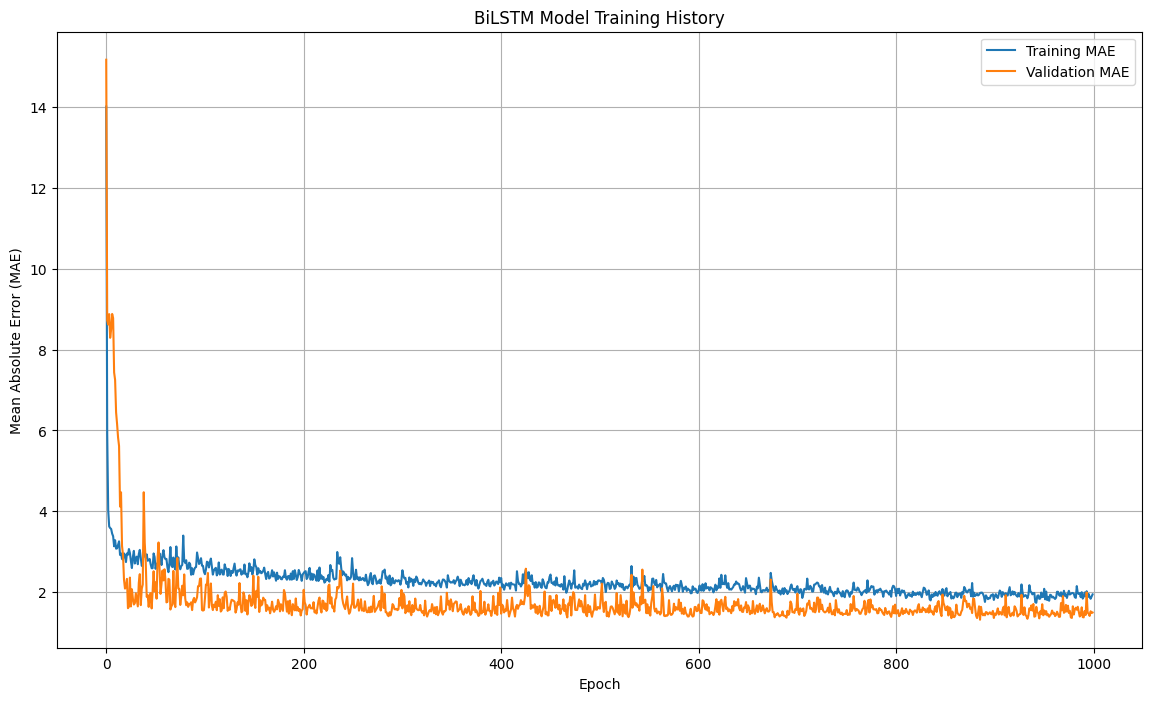

In [82]:
plt.figure(figsize=(14, 8))
plt.plot(history.history['mae'], label='Training MAE')
# Now you can plot validation MAE
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('BiLSTM Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
tcnn_model.save("models/Type_3_models/tcnn_model.keras")

In [84]:
bilstm_model.save("models/Type_3_models/bilstm_model.keras")